# Taller Conteo de Objetos

## Contornos

Los contornos se pueden explicar simplemente como una curva que une todos los puntos continuos
(a lo largo del límite), que tienen el mismo color o intensidad. Los contornos son una herramienta
útil para el análisis de formas y la detección y reconocimiento de objetos.
Para una mejor precisión, use imágenes binarias. Entonces, antes de encontrar contornos, aplique
el umbral o la detección de bordes irregulares.
Desde OpenCV 3.2, `findContours()` ya no modifica la imagen de origen.
En OpenCV, encontrar contornos es como encontrar objetos blancos de fondo negro. Así que
recuerde, el objeto que se debe encontrar debe ser blanco y el fondo debe ser negro

## Detección de Contornos

Para detectar contornos utilizamos la funcion `cv.findContours()`, hay tres argumentos en la función,
el primero es la imagen de origen, el segundo es el modo de recuperación de contorno, el tercero
es el método de aproximación de contorno. Y genera los contornos y la jerarquía. Contornos es
una lista de Python de todos los contornos de la imagen. Cada contorno individual es una matriz
`Numpy` de coordenadas (x, y) de puntos límite del objeto.

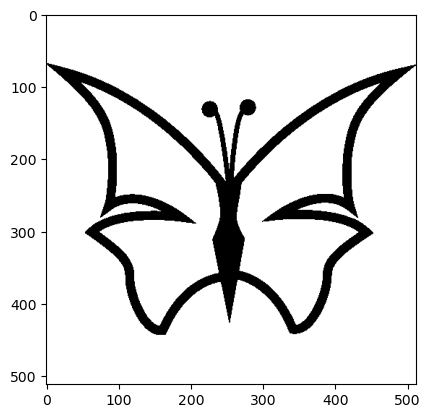

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# cargamos una imagen
img = cv.imread("imgs/mariposa.png")
# cambiamos su espacio de color a escala de grises
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# mostramos el contenido
plt.imshow(img_gray, cmap='gray')

In [2]:
# Aplicamos deteccion de contornos
# binarisamos la imagen
res,th = cv.threshold(img_gray,127,255, cv.THRESH_BINARY )
# encontramos los contornos
contornos, jerarquia = cv.findContours(th,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contornos[2]

array([[[  0,  69]],

       [[  0, 511]],

       [[511, 511]],

       ...,

       [[ 11,  79]],

       [[  6,  74]],

       [[  5,  74]]], dtype=int32)

**¿Cómo dibujar los contornos?** Para dibujar los contornos, se utiliza la función
cv.drawContours . También se puede usar para dibujar cualquier forma siempre que tenga sus
puntos de límite. Su primer argumento es la imagen de origen, el segundo argumento son los contornos
que deben pasarse como una lista de Python, el tercer argumento es el índice de contornos
(útil al dibujar contornos individuales. Para dibujar todos los contornos, pase -1) y los argumentos
restantes son color, grosor etc

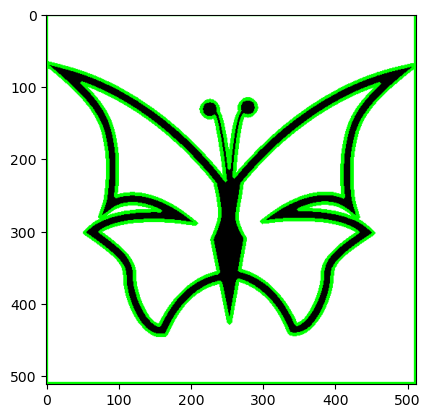

In [3]:
# Para dibujar los contornos de una imagen
cv.drawContours(img, contornos, -1,(0,255,0),3)
# graficamos la imagen
plt.imshow(img)

## TrackBar



La función createTrackbar crea una barra de seguimiento ( un control deslizante o control de rango ) con el nombre y rango especificados, asigna un valor variable para que sea una posición sincronizada con la barra de seguimiento y especifica la función de devolución de llamada en Cambiar que se llamará en el cambio de posición de la barra de seguimiento. La barra de seguimiento creada se muestra en el nombre de ganancia de ventana especificado.

Parámetros
- `trackbarname:`	Nombre de la barra de seguimiento creada.
- `Ventana:`	Nombre de la ventana que se utilizará como padre de la barra de seguimiento creada.
- `valor inicial:`	Puntero opcional a una variable entera cuyo valor refleja la posición del control deslizante. Tras la creación, la posición del control deslizante se define por esta variable.
- `Valor Final:`	Posición máxima del control deslizante. La posición mínima es siempre 0.
- `TrackBar Callback:` Puntero a la función a llamar cada vez que el control deslizante cambia de posición.Donde el parámetro es la posición de la barra de seguimiento


In [4]:
# importamos librerias
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def mezcla(val):
    val=val/100
    val2= abs(1-val)
    img1 = cv.imread("imgs/yolo.jpg")
    img2 = cv.imread("imgs/python_logo.jpg")
    # cambiamos el espacio de color
    img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    # igualamos el tamano
    fil,cols,can = img1.shape
    img2 = cv.resize(img2,(cols,fil))
    img_out = cv.addWeighted(img1,val2,img2,val,0.0)
    cv.imshow("image",img_out)
    

cv.namedWindow('image',cv.WINDOW_NORMAL)
cv.createTrackbar('Alfa','image',0,100,mezcla)

cv.waitKey(0)
cv.destroyAllWindows()

## Conteo de Objetos por detección de Contornos, Ejemplo Practico

In [6]:
import numpy as np
import cv2 as cv

img_ref = np.zeros((100,20,3),np.uint8) 

def nothing(x):
    pass

def contornos(img,img_r):
    contornos,_ = cv.findContours(img_r, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    esporas=len(contornos)

    cv.drawContours(img, contornos, -1, (0,255,0),2)
    cv.putText(img, 'Cantidad:'+str(esporas), (30,30), cv.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),2)
    return img
    #cv.imwrite('4_count.jpg',img)

def filtrado(img_fil,u_bajo, u_alto):
    img_fil=cv.blur(img_fil,(5,5))
    img_fil=cv.medianBlur(img_fil, 5)
    #cv.imshow('Filtrado',img_fil)
    
    img_gray = cv.cvtColor(img_fil, cv.COLOR_BGR2GRAY)
    
    res, th =cv.threshold(img_gray, u_bajo, u_alto, cv.THRESH_BINARY)
    cv.imshow('Binarizacion',th)
    img_inverse= cv.bitwise_not(th)
    cv.imshow('Inversion',img_inverse)
    kernel=np.ones((3,3), np.uint8)
    img_dil =cv.erode(img_inverse ,kernel, iterations=2)
    img_dil =cv.dilate(img_dil ,kernel, iterations=1)
    img_dil =cv.erode(img_dil ,kernel, iterations=4)
    img_dil =cv.dilate(img_dil ,kernel, iterations=2)
    cv.imshow('erosion',img_dil)
    return img_dil

cv.namedWindow('image',cv.WINDOW_NORMAL)
cv.namedWindow('Output',cv.WINDOW_NORMAL)
cv.namedWindow('Binarizacion',cv.WINDOW_NORMAL)
cv.namedWindow('Inversion',cv.WINDOW_NORMAL)
cv.namedWindow('erosion',cv.WINDOW_NORMAL)

# Trackbar para umbrales
cv.createTrackbar('alfa','image',0,255,nothing)
cv.createTrackbar('beta','image',0,255,nothing)
cv.imshow('image',img_ref)
while(1):
    # Cargamos la imagen 
    img = cv.imread('imgs_lab/4.jpg')
    umbral_alto = cv.getTrackbarPos('alfa','image')
    umbral_bajo = cv.getTrackbarPos('beta','image')

    img_ret = filtrado(img, int(umbral_bajo), int(umbral_alto))
    img_out = contornos(img, img_ret)
    cv.imshow('Output',img_out)

    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()